<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Identificación de objetos (GPU)

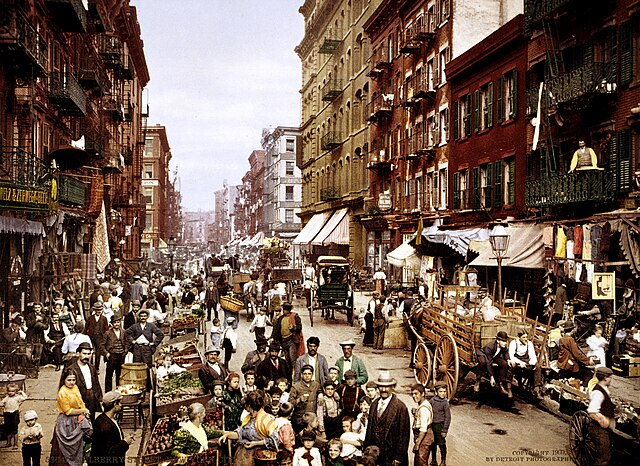


image 1/1 /content/image.jpg: 480x640 12 persons, 63.6ms
Speed: 1.5ms preprocess, 63.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Coordenadas: tensor([[364.0872, 370.9476, 410.5723, 465.7779]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.5986], device='cuda:0')

Coordenadas: tensor([[409.2825, 383.1328, 433.8698, 466.0000]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.5817], device='cuda:0')

Coordenadas: tensor([[427.5295, 381.1416, 451.6563, 465.9686]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.5161], device='cuda:0')

Coordenadas: tensor([[293.0505, 336.0190, 329.4248, 386.5290]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.4685], device='cuda:0')

Coordenadas: tensor([[ 17.2176, 409.7812,  43.2844, 465.9221]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.4599], device='cuda:0')

Coordenadas: te

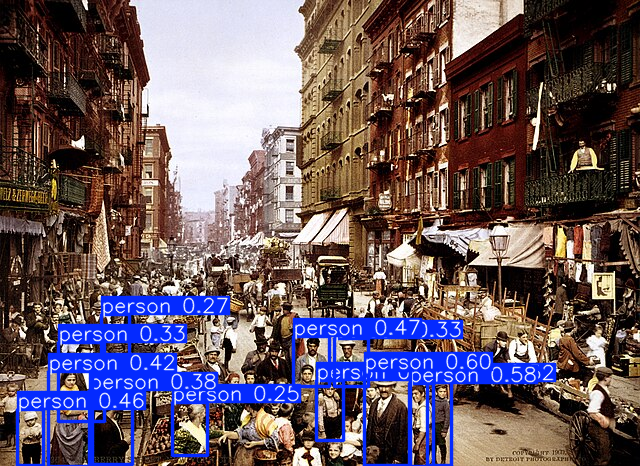

In [12]:
# prompt: dada una imagen referenciada mediabte una url, descargala, muestrala y, empleando yolo v8, muestra las identificaciones que ha hecho (localización, id y core) para finalmente mostrar la imagen con las identificaciones rotuladas.

!pip -q install ultralytics

import PIL
from IPython.display import Image, display
from ultralytics import YOLO

# URL de la imagen
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/NYC_Mulberry_Street_3g04637u.jpg/640px-NYC_Mulberry_Street_3g04637u.jpg"
#image_url = "https://raw.github.com/FranPuentes/iTI2025/main/data/traffic.jpg"

# Descargar la imagen
!wget -q {image_url} -O image.jpg

# Mostrar la imagen descargada
display(Image(filename='image.jpg'))

# Cargar el modelo YOLOv8
model = YOLO('yolov8x.pt')

# Realizar la detección de objetos
results = model('image.jpg')

# Mostrar las detecciones (localización, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen con las etiquetas
# NOTA: esta parte fue añadida a mano, el original intercambiaba los canales Red y Blue.
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image


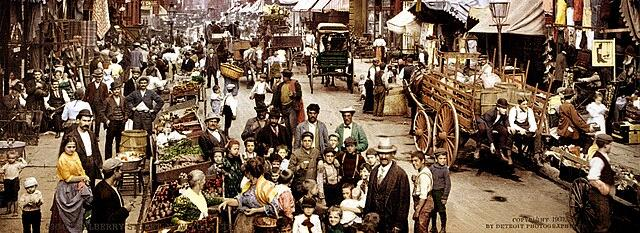


image 1/1 /content/cropped_image.jpg: 256x640 12 persons, 136.5ms
Speed: 1.5ms preprocess, 136.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Coordenadas: tensor([[362.7546, 138.5987, 410.4313, 232.8205]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.6566], device='cuda:0')

Coordenadas: tensor([[409.3051, 150.2954, 434.1228, 232.8103]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.5731], device='cuda:0')

Coordenadas: tensor([[586.8230, 131.9948, 616.2300, 231.7139]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.4998], device='cuda:0')

Coordenadas: tensor([[ 47.9995, 154.1859,  92.6455, 232.8652]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.4865], device='cuda:0')

Coordenadas: tensor([[428.0404, 149.3771, 451.6206, 232.7271]], device='cuda:0')
ID de clase: tensor([0.], device='cuda:0')
Score: tensor([0.4635], device='cuda:0')

Coord

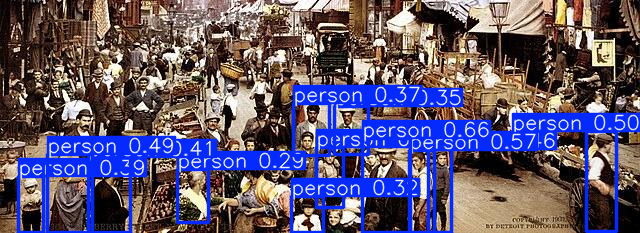

In [ ]:
# prompt: En la imagen anterior (en el fichero image.jpg), hacer un zoom en la mitad inferior y volver a hacer la prediccón, mostrando los resultados y la imagen con las identificaciones.

# Recortar la imagen (mitad inferior)
image = PIL.Image.open('image.jpg')
width, height = image.size
cropped_image = image.crop((0, height // 2, width, height))
cropped_image.save('cropped_image.jpg')

# Mostrar la imagen recortada
display(Image(filename='cropped_image.jpg'))

# Realizar la detección de objetos en la imagen recortada
results = model('cropped_image.jpg')

# Mostrar las detecciones (localización, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen recortada con las etiquetas
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image


## Entrenando modelos de identificación de objetos

### Reconocimiento de formas